In [335]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
path="./data/salaries.csv"

In [337]:
df=pd.read_csv(path)

In [338]:
data=df.copy()
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


### Data Preprocessing

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [340]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [341]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [342]:
data.drop(['work_year','salary', 'salary_currency', 'remote_ratio', ], inplace=True, axis=1)

### Visualizing Data

In [343]:
data['job_title'].value_counts()

job_title
Data Scientist                     17574
Software Engineer                  15367
Data Engineer                      15117
Data Analyst                       12653
Engineer                            9742
                                   ...  
Fraud Data Analyst                     1
Data Engineer 4                        1
CRM Data Analyst                       1
Quantitative Research Analyst          1
Staff Machine Learning Engineer        1
Name: count, Length: 398, dtype: int64

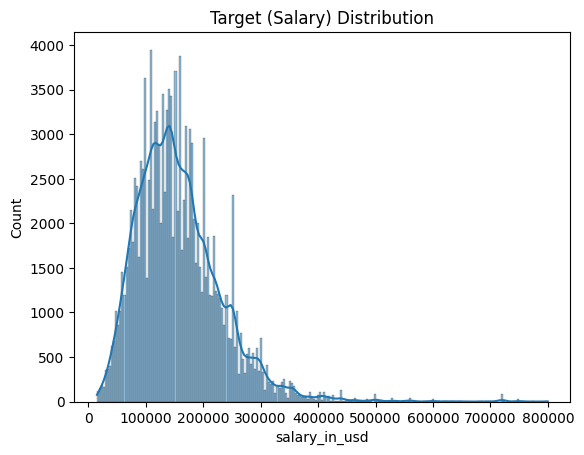

In [344]:
sns.histplot(data['salary_in_usd'], kde=True)
plt.title("Target (Salary) Distribution")
plt.show()

In [345]:
data['salary_in_usd'] = np.log1p(data['salary_in_usd'])

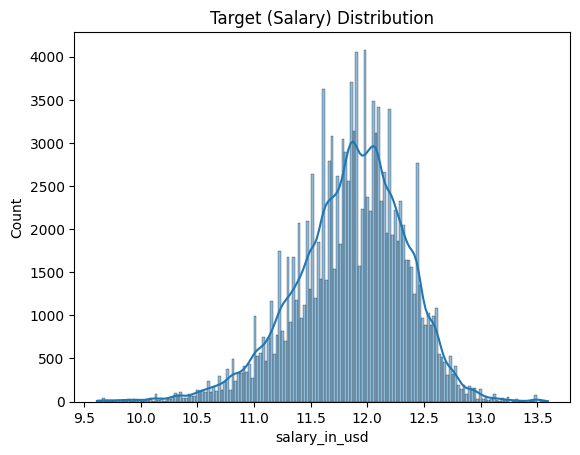

In [346]:
sns.histplot(data['salary_in_usd'], kde=True)
plt.title("Target (Salary) Distribution")
plt.show()

In [347]:
def map_job_title(title):
    title = title.lower()
    if 'data scientist' in title or 'ai scientist' in title:
        return 'Data Scientist'
    elif 'ml' in title or 'machine learning' in title:
        return 'ML Engineer'
    elif 'data engineer' in title or 'etl' in title:
        return 'Data Engineer'
    elif 'software' in title or 'developer' in title or 'engineer' in title:
        return 'Software Engineer'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'research' in title:
        return 'Research Scientist'
    elif 'manager' in title or 'lead' in title:
        return 'Manager'
    elif 'architect' in title:
        return 'Architect'
    else:
        return 'Other'

In [348]:
data['job_title'] = data['job_title'].apply(map_job_title)

In [349]:
data['job_title'].value_counts()

job_title
Software Engineer     40965
Analyst               20699
Data Scientist        17748
Data Engineer         15217
Manager               12165
Other                 11725
ML Engineer           10076
Architect              4140
Research Scientist     4022
Name: count, dtype: int64

In [350]:
# plt.pie(data['job_title'].value_counts(), labels=data['job_title'].value_counts().index, autopct='%1.2f%%')
# plt.show()

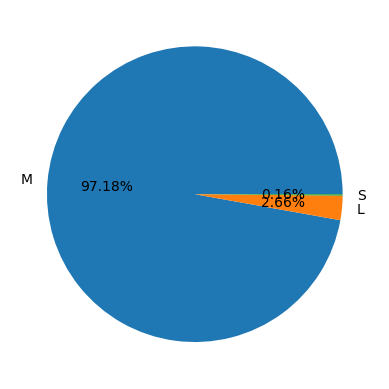

In [351]:
plt.pie(data['company_size'].value_counts(), labels=data['company_size'].value_counts().index, autopct='%1.2f%%')
plt.show()

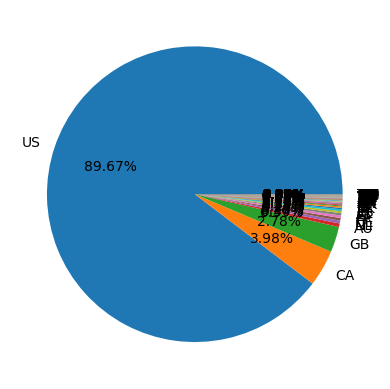

In [352]:
plt.pie(data['company_location'].value_counts(), labels=data['company_location'].value_counts().index, autopct='%1.2f%%')
plt.show()

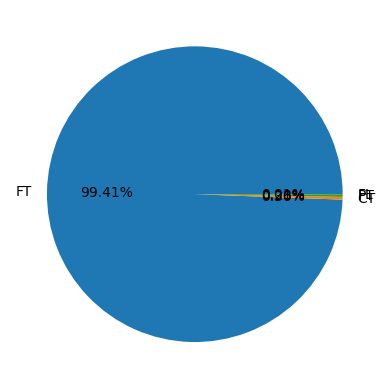

In [353]:
plt.pie(data['employment_type'].value_counts(), labels=data['employment_type'].value_counts().index, autopct='%1.2f%%')
plt.show()

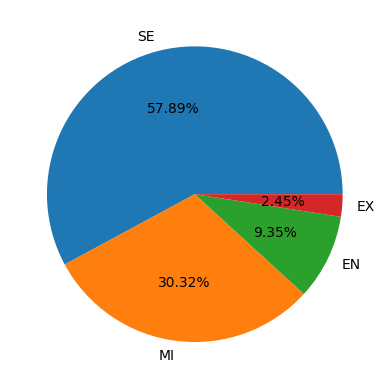

In [354]:
plt.pie(data['experience_level'].value_counts(), labels=data['experience_level'].value_counts().index, autopct='%1.2f%%')
plt.show()

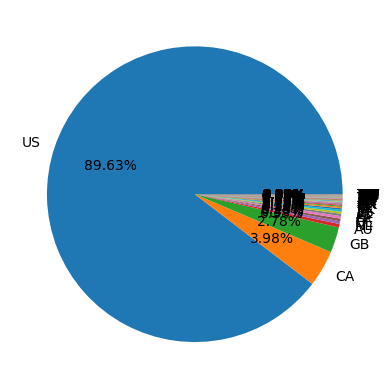

In [355]:
plt.pie(data['employee_residence'].value_counts(), labels=data['employee_residence'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [356]:
# dropping 'company_location' 'company_size' 'employment_type' 'employee_residence' because of imbalances
data.drop(['company_location', 'company_size', 'employment_type', 'employee_residence'], inplace=True, axis=1)

In [357]:
data.columns

Index(['experience_level', 'job_title', 'salary_in_usd'], dtype='object')

### Encoding Categorical Columns

In [358]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [359]:
# manual mapping experience level
experience_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
data['experience_level'] = data['experience_level'].map(experience_mapping)
# encoding job titles
data['job_title'] = le.fit_transform(data['job_title'])

In [360]:
data.head()

,experience_level,job_title,salary_in_usd
0,1,3,11.795100
1,1,3,11.532738
2,2,5,12.470439
3,2,5,11.851403
4,2,4,12.278398


### Starting Training

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="./data/salaries.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
data=df.copy()
print(f"Dataset shape: {data.shape}")
data.head()

### Advanced Data Preprocessing

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Keep more features - only drop truly redundant ones
data.drop(['salary', 'salary_currency'], inplace=True, axis=1)
print(f"Columns after initial drop: {data.columns.tolist()}")

In [ ]:
# Handle outliers in salary using IQR method
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Original dataset size: {len(data)}")
print(f"Salary range: {data['salary_in_usd'].min()} - {data['salary_in_usd'].max()}")
print(f"Outlier bounds: {lower_bound} - {upper_bound}")

# Remove extreme outliers but keep reasonable high salaries
data = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound * 1.5)]
print(f"Dataset size after outlier removal: {len(data)}")

In [ ]:
# Visualize salary distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['salary_in_usd'], kde=True)
plt.title("Original Salary Distribution")

# Apply log transformation
data['salary_in_usd'] = np.log1p(data['salary_in_usd'])

plt.subplot(1, 2, 2)
sns.histplot(data['salary_in_usd'], kde=True)
plt.title("Log-transformed Salary Distribution")
plt.tight_layout()
plt.show()

In [ ]:
# Advanced job title mapping with more categories
def advanced_job_mapping(title):
    title = title.lower()
    if 'data scientist' in title or 'ai scientist' in title:
        return 'Data Scientist'
    elif 'ml' in title or 'machine learning' in title:
        return 'ML Engineer'
    elif 'data engineer' in title or 'etl' in title:
        return 'Data Engineer'
    elif 'software' in title or 'developer' in title:
        return 'Software Engineer'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'research' in title:
        return 'Research Scientist'
    elif 'manager' in title or 'lead' in title or 'director' in title:
        return 'Manager'
    elif 'architect' in title:
        return 'Architect'
    elif 'consultant' in title:
        return 'Consultant'
    elif 'engineer' in title:
        return 'Engineer'
    else:
        return 'Other'

data['job_title'] = data['job_title'].apply(advanced_job_mapping)
print("Job title distribution:")
print(data['job_title'].value_counts())

In [ ]:
# Create country groupings for better encoding
def group_countries(country_code):
    # High-salary countries
    high_salary_countries = ['US', 'CA', 'GB', 'AU', 'DE', 'CH', 'NL', 'SE', 'DK', 'NO']
    # Medium-salary countries
    medium_salary_countries = ['FR', 'IT', 'ES', 'BE', 'AT', 'IE', 'FI', 'JP', 'KR', 'SG', 'IL']

    if country_code in high_salary_countries:
        return 'High_Salary_Country'
    elif country_code in medium_salary_countries:
        return 'Medium_Salary_Country'
    else:
        return 'Other_Country'

# Apply country grouping
data['company_location_group'] = data['company_location'].apply(group_countries)
data['employee_residence_group'] = data['employee_residence'].apply(group_countries)

In [ ]:
# Feature Engineering
# 1. Create experience-title interaction
data['exp_title_interaction'] = data['experience_level'] + '_' + data['job_title']

# 2. Create remote work indicator
data['is_remote'] = (data['remote_ratio'] == 100).astype(int)
data['is_hybrid'] = ((data['remote_ratio'] > 0) & (data['remote_ratio'] < 100)).astype(int)

# 3. Create year-based features
data['work_year_recent'] = (data['work_year'] >= 2022).astype(int)

# 4. Create company size numeric mapping
size_mapping = {'S': 1, 'M': 2, 'L': 3}
data['company_size_numeric'] = data['company_size'].map(size_mapping)

# 5. Create employment type numeric mapping
employment_mapping = {'PT': 1, 'FT': 2, 'CT': 3, 'FL': 4}
data['employment_type_numeric'] = data['employment_type'].map(employment_mapping)

print("New features created:")
print(data[['is_remote', 'is_hybrid', 'work_year_recent', 'company_size_numeric', 'employment_type_numeric']].head())

In [ ]:
# One-hot encode categorical variables
categorical_features = ['job_title', 'company_location_group', 'employee_residence_group', 'company_size', 'employment_type']

# Create dummy variables
data_encoded = pd.get_dummies(data, columns=categorical_features, prefix=categorical_features)

In [ ]:
# Manual experience level mapping (ordinal)
experience_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
data_encoded['experience_level'] = data_encoded['experience_level'].map(experience_mapping)

In [ ]:
# Drop original columns that are now encoded
columns_to_drop = ['exp_title_interaction', 'company_location', 'employee_residence']
data_encoded = data_encoded.drop(columns=[col for col in columns_to_drop if col in data_encoded.columns])

In [ ]:
print(f"Final dataset shape: {data_encoded.shape}")
print(f"Feature columns: {[col for col in data_encoded.columns if col != 'salary_in_usd']}")

### Advanced Model Training

In [ ]:
# Prepare features and target
X = data_encoded.drop(['salary_in_usd'], axis=1)
y = data_encoded['salary_in_usd']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=5, labels=False))

In [ ]:
# Advanced model configurations with hyperparameter tuning
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

gb_params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [6, 8, 10],
    'subsample': [0.8, 0.9]
}

xgb_params = {
    'n_estimators': [300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

In [ ]:
# Perform grid search for best parameters
print("Tuning Random Forest...")
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best RF parameters: {rf_grid.best_params_}")
print(f"Best RF CV score: {rf_grid.best_score_:.4f}")

In [ ]:
print("Tuning Gradient Boosting...")
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
print(f"Best GB parameters: {gb_grid.best_params_}")
print(f"Best GB CV score: {gb_grid.best_score_:.4f}")

In [ ]:
print("Tuning XGBoost...")
xgb = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGB parameters: {xgb_grid.best_params_}")
print(f"Best XGB CV score: {xgb_grid.best_score_:.4f}")

In [ ]:
# Add Ridge regression for ensemble diversity
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

In [ ]:
# Create ensemble model
ensemble = VotingRegressor([
    ('rf', best_rf),
    ('gb', best_gb),
    ('xgb', best_xgb),
    ('ridge', ridge)
], weights=[0.3, 0.25, 0.35, 0.1])

ensemble.fit(X_train, y_train)

In [ ]:
# Make predictions
pred_rf = best_rf.predict(X_test)
pred_gb = best_gb.predict(X_test)
pred_xgb = best_xgb.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_ensemble = ensemble.predict(X_test)

In [ ]:
# Advanced evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Accuracy: {r2*100:.2f}%")

    return r2

# Evaluate all models
rf_r2 = evaluate_model(y_test, pred_rf, "Random Forest")
gb_r2 = evaluate_model(y_test, pred_gb, "Gradient Boosting")
xgb_r2 = evaluate_model(y_test, pred_xgb, "XGBoost")
ridge_r2 = evaluate_model(y_test, pred_ridge, "Ridge Regression")
ensemble_r2 = evaluate_model(y_test, pred_ensemble, "Ensemble")

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': best_rf.feature_importances_,
    'gb_importance': best_gb.feature_importances_,
    'xgb_importance': best_xgb.feature_importances_
})

# Average importance across models
feature_importance['avg_importance'] = feature_importance[['rf_importance', 'gb_importance', 'xgb_importance']].mean(axis=1)
feature_importance = feature_importance.sort_values('avg_importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [ ]:
# Visualize results
plt.figure(figsize=(15, 10))

# Plot 1: Model comparison
plt.subplot(2, 3, 1)
models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Ridge', 'Ensemble']
r2_scores = [rf_r2, gb_r2, xgb_r2, ridge_r2, ensemble_r2]
bars = plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{r2_scores[i]:.3f}', ha='center', va='bottom')

# Plot 2: Feature importance
plt.subplot(2, 3, 2)
top_features = feature_importance.head(10)
plt.barh

In [361]:
from sklearn.model_selection import train_test_split

X = data.drop(['salary_in_usd'], axis=1)
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [362]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [373]:
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)

In [374]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gb.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [375]:
pred_rf=(rf.predict(X_test))
pred_xgb=(xgb.predict(X_test))
pred_gb=(gb.predict(X_test))

In [376]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Random Forest MSE: {mean_squared_error(y_test, pred_rf)}")
print(f"Random Forest R2: {r2_score(y_test, pred_rf)}")

Random Forest MSE: 0.18502642552306348
Random Forest R2: 0.22973950113569463


In [377]:
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, pred_gb)}")
print(f"Gradient Boosting R2: {r2_score(y_test, pred_gb)}")

Gradient Boosting MSE: 0.185071521204901
Gradient Boosting R2: 0.22955176891155094


In [378]:
print(f"XGBoost MSE: {mean_squared_error(y_test, pred_xgb)}")
print(f"XGBoost R2: {r2_score(y_test, pred_xgb)}")

XGBoost MSE: 0.1864284359814767
XGBoost R2: 0.2239029657756374
